In [1]:
import json
import os
from pycocotools.coco import COCO

In [2]:
image_info_json_file_path = './train.json'
with open(image_info_json_file_path, 'r') as f:
    df = json.load(f)

In [ ]:
df

### bbox 면적 분포 확인

In [ ]:
areas = []
for annotation in df['annotations']:
    bbox = annotation['bbox']
    width = bbox[2]
    height = bbox[3]
    area = width * height
    print(area)
    areas.append(area)

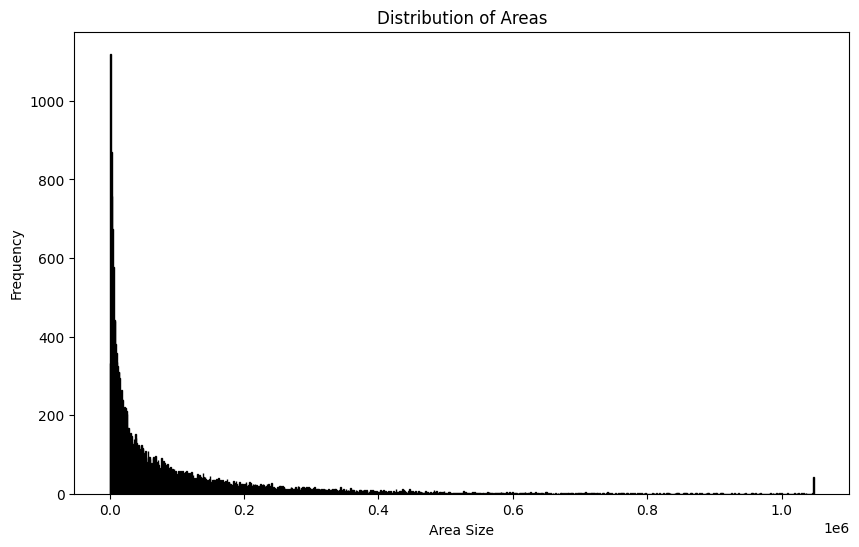

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(areas, bins=1000, edgecolor='black', color='orange')  # bins로 막대기 수 조절
plt.title("Distribution of Areas")
plt.xlabel("Area Size")
plt.ylabel("Frequency")
plt.show()

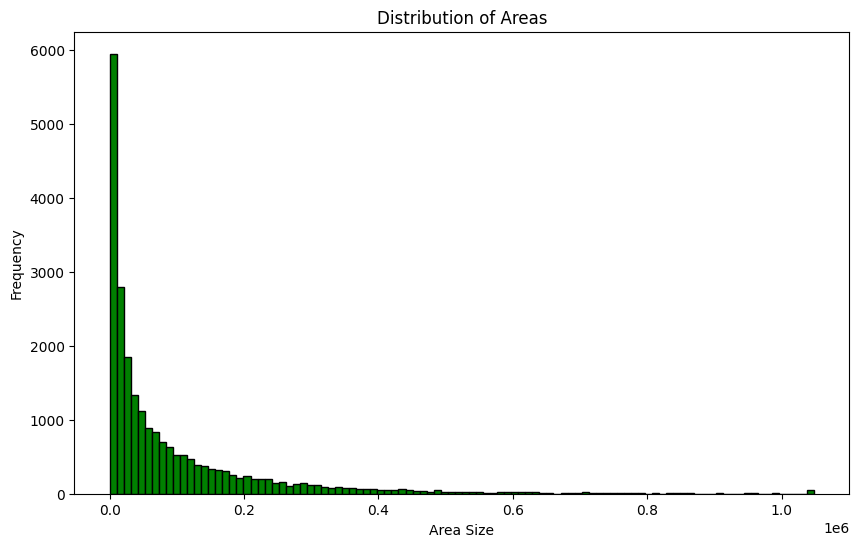

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(areas, bins=100, edgecolor='black', color='green')  # bins로 막대기 수 조절
plt.title("Distribution of Areas")
plt.xlabel("Area Size")
plt.ylabel("Frequency")
plt.show()

In [9]:
import numpy as np
areas_np = np.array(areas)
filtered_areas = areas_np[areas_np < 100000]
filtered_areas

array([10402.56, 26259.36, 69096.17, ..., 57309.72,  1772.74, 53008.67])

### 10만단위 이상은 자르고 봐보기

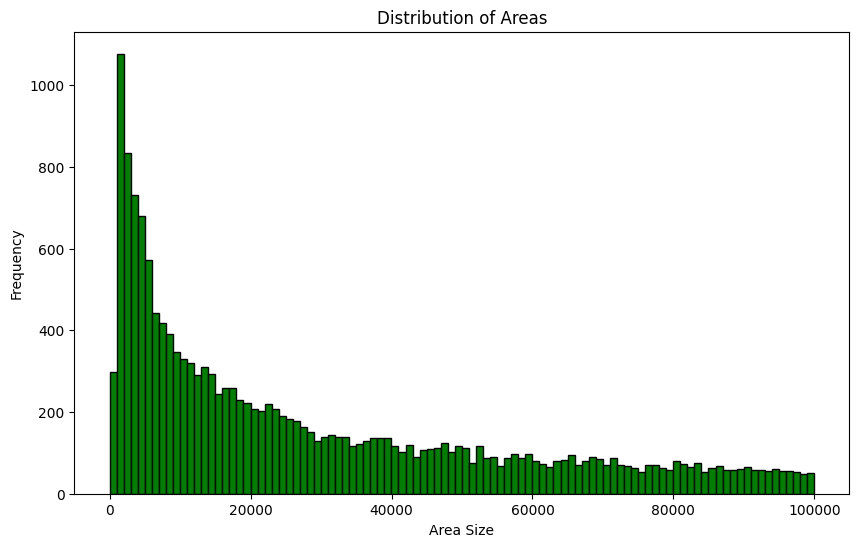

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(filtered_areas, bins=100, edgecolor='black', color='green')  # bins로 막대기 수 조절
plt.title("Distribution of Areas")
plt.xlabel("Area Size")
plt.ylabel("Frequency")
plt.show()

### small bbox, medium bbox 개수 확인

In [25]:
filtered_areas_32 = filtered_areas[filtered_areas < 32*32]
filtered_areas_96 = filtered_areas[filtered_areas < 96*96]
print(len(filtered_areas_32))
print(len(filtered_areas_96))

313
5507


### 이미지 개수 확인

In [31]:
image_bbox_dict = [{'image_id': annotation['image_id'], 'bbox': annotation['bbox']} for annotation in df['annotations']]

In [ ]:
image_bbox_dict

In [41]:
image_area_dict = {}
for image in image_bbox_dict:
    width = image['bbox'][2]
    height = image['bbox'][3]
    area = width * height
    image_area_dict[image['image_id']] = area

print(image_area_dict)

{0: 257301.65999999997, 1: 6857.76, 2: 324010.8, 3: 80710.56, 4: 4523.64, 5: 7761.0, 6: 222913.17, 7: 391485.88, 8: 559347.65, 9: 168024.78000000003, 10: 102452.04000000001, 11: 13126.08, 12: 94348.24, 13: 40667.06, 14: 5270.52, 15: 5897.64, 16: 348151.91, 17: 305691.87, 18: 2771.2, 19: 535229.24, 20: 117079.81999999999, 21: 8881.83, 22: 240330.24, 23: 342823.66, 24: 176296.5, 25: 143371.8, 26: 196047.90000000002, 27: 107428.64000000001, 28: 36600.08, 29: 80547.72, 30: 366753.8, 31: 23266.88, 32: 476226.96, 33: 111109.43999999999, 34: 357343.98, 35: 142263.69, 36: 8251.470000000001, 37: 223585.91999999995, 38: 1590.45, 39: 60703.450000000004, 40: 106768.83000000002, 41: 85566.51999999999, 42: 1226.1599999999999, 43: 133212.56, 44: 73197.95, 45: 1718.56, 46: 165238.15, 47: 86910.76, 48: 185563.66000000003, 49: 51419.76, 50: 240207.35, 51: 27258.000000000004, 52: 167008.14, 53: 20994.84, 54: 6345.0, 55: 96928.0, 56: 10603.18, 57: 311800.60000000003, 58: 343533.12000000005, 59: 139240.68,

In [ ]:
image_area_dict

In [43]:
areas_values = np.array(list(image_area_dict.values()))

filtered_areas_32 = areas_values[areas_values < 32*32]
filtered_areas_96 = areas_values[areas_values < 96*96]

print(len(filtered_areas_32))  
print(len(filtered_areas_96))  

43
722
